**You can download the data set from : https://www.kaggle.com/osmi/mental-health-in-tech-survey**

**If you want to try the code for yourself make sure you change the directory to where you saved the data set on disk.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import average_precision_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import plot_precision_recall_curve
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import f1_score

# Importing, Exploring and Cleaning the data:

In [2]:
data=pd.read_csv("./datasets.csv")

In [3]:
data.head(10)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [4]:
data.shape

(1259, 27)

In [5]:
data.info() #checking how many NaNs are in the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
Timestamp                    1259 non-null object
Age                          1259 non-null int64
Gender                       1259 non-null object
Country                      1259 non-null object
state                        744 non-null object
self_employed                1241 non-null object
family_history               1259 non-null object
treatment                    1259 non-null object
work_interfere               995 non-null object
no_employees                 1259 non-null object
remote_work                  1259 non-null object
tech_company                 1259 non-null object
benefits                     1259 non-null object
care_options                 1259 non-null object
wellness_program             1259 non-null object
seek_help                    1259 non-null object
anonymity                    1259 non-null object
leave                        1259 non-null obj

**we can see that "Timestamp" , "comments" & "state" have a lot of NaN values, so we just delete those columns. Besides they are not relevant to the problem we are trying to address. "Work_interfere" & "self_employed" columns also have a number of NaNs but not as much as the mentioned 3 columns!**

In [6]:
del data["state"]
del data["comments"]
del data["Timestamp"]

In [7]:
#Printing the unique values in each column
dict={}
for f in data.columns:
    dict[f]=data[f].unique()
    
dict

{'Age': array([         37,          44,          32,          31,          33,
                 35,          39,          42,          23,          29,
                 36,          27,          46,          41,          34,
                 30,          40,          38,          50,          24,
                 18,          28,          26,          22,          19,
                 25,          45,          21,         -29,          43,
                 56,          60,          54,         329,          55,
        99999999999,          48,          20,          57,          58,
                 47,          62,          51,          65,          49,
              -1726,           5,          53,          61,           8,
                 11,          -1,          72], dtype=int64),
 'Gender': array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
        'Trans-female', 'Cis Female', 'F', 'something kinda male?',
        'Cis Male', 'Woman', 'f', 'Mal', 'Male (

**Clearly the values in columns "Age" & "Gender" need to be cleaned. We can see that those who have chosen ages above 80 or under 15 usually do not take time to fill the questionnaire correctly. As a result, it's better to remove them from the list of participants in the test**

In [8]:
data[(data["Age"]>80)|((data["Age"]<15))]

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,anonymity,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence
143,-29,Male,United States,No,No,No,NaN,More than 1000,Yes,No,...,Don't know,Don't know,No,No,Some of them,Yes,No,No,Don't know,No
364,329,Male,United States,No,No,Yes,Often,6-25,Yes,Yes,...,Don't know,Don't know,Maybe,No,Some of them,No,No,No,No,No
390,99999999999,All,Zimbabwe,Yes,Yes,Yes,Often,1-5,No,Yes,...,No,Very difficult,Yes,Yes,No,No,Yes,No,No,Yes
715,-1726,male,United Kingdom,No,No,Yes,Sometimes,26-100,No,No,...,Don't know,Somewhat difficult,Yes,No,No,No,No,Maybe,Don't know,No
734,5,Male,United States,No,No,No,NaN,100-500,No,Yes,...,Don't know,Somewhat easy,No,No,Yes,Yes,No,No,Yes,No
989,8,A little about you,"Bahamas, The",Yes,Yes,Yes,Often,1-5,Yes,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes
1090,11,male,United States,Yes,No,No,Never,1-5,Yes,Yes,...,Yes,Very easy,No,No,Some of them,Some of them,No,Maybe,Yes,No
1127,-1,p,United States,Yes,Yes,Yes,Often,1-5,Yes,Yes,...,Yes,Very easy,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes


In [9]:
data_cleaned = data[(data["Age"]<80)&((data["Age"]>15))]

In [10]:
data_cleaned.shape

(1251, 24)

In [11]:
data_cleaned.describe()

,Age
count,1251.000000
mean,32.076739
std,7.288272
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


**Now we categorize the genders into three main categories, "male", "female", and "trans". At the end, if the sample does not fall into one of these categories, we remove it from the list**


In [12]:
male_str = ["male", "m", "male-ish", "maile", "mal", "male (cis)", "make", "male ", "man","msle", \
            "mail", "malr","cis man", "Cis Male", "cis male"]

trans_str = ["trans-female", "something kinda male?", "queer/she/they", "non-binary","nah", "all", "enby", \
             "fluid", "genderqueer", "androgyne", "agender", "male leaning androgynous", "guy (-ish) ^_^", \
             "trans woman", "neuter", "female (trans)", "queer"]   

female_str = ["cis female", "f", "female", "woman",  "femake", "female ","cis-female/femme", "female (cis)", "femail"]

In [13]:
to_be_deleted=[]
for i in range(len(data_cleaned)):
    if data_cleaned["Gender"].iloc[i].lower() in male_str:
        data_cleaned["Gender"].iloc[i]="male"
    elif data_cleaned["Gender"].iloc[i].lower() in trans_str:
        data_cleaned["Gender"].iloc[i]= "trans"
    elif data_cleaned["Gender"].iloc[i].lower() in female_str:
        data_cleaned["Gender"].iloc[i]="female"
    else:
        to_be_deleted.append(i)
        
for i in  to_be_deleted:
    data_cleaned = data_cleaned.drop(data_cleaned.index[i])
    
    

C:\Users\mirza\Anaconda3\lib\site-packages\pandas\core\indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
C:\Users\mirza\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\mirza\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\mirza

In [14]:
data_cleaned["Gender"].unique()

array(['female', 'male', 'trans'], dtype=object)

In [15]:
data_cleaned.shape

(1250, 24)

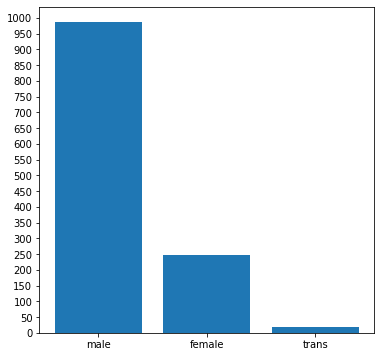

In [16]:
#Plot a bar chart to see the distribution of the genders in the data set
plt.figure(figsize=(6,6))
counts=data_cleaned["Gender"].value_counts()
plt.bar(counts.index, counts.values)
plt.yticks(np.arange(0,1001,step=50))
plt.show()

 **Now we can get back to the problem of having NaNs in "self_employed" & "work_interfere" columns:**

In [17]:
rate=data_cleaned["self_employed"].describe().freq/data_cleaned["self_employed"].count()
print("The most frequent answer to \"self_employed\" question is:",data_cleaned["self_employed"].describe().top,\
      ", with a frequency rate of",rate)

The most frequent answer to "self_employed" question is: No , with a frequency rate of 0.8847402597402597


**As a result we will replace NaNs with "No"** 

In [18]:
data_cleaned["self_employed"].fillna(value="No",inplace=True)

In [19]:
data_cleaned["self_employed"].describe()

count     1250
unique       2
top         No
freq      1108
Name: self_employed, dtype: object

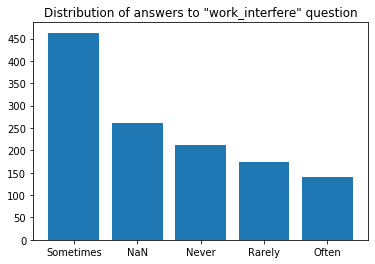

In [20]:
data_cleaned["work_interfere"].fillna(value="NaN",inplace=True)
counts=data_cleaned["work_interfere"].value_counts()
plt.bar(counts.index, counts.values)
plt.yticks(np.arange(0,500,step=50))
plt.title("Distribution of answers to \"work_interfere\" question")
plt.show()

**As it can be seen in the bar chart above, non of the answers is dominant considering the count of the NaNs. As a result, we keep NaN as an answer to the question so that we have 5 different classes here.**

**Next, we add a new column to our DataFrame called "Age_range". This enables us to explore the data more using new plots in the future.**

In [21]:
data_cleaned["Age_range"]=pd.cut(data_cleaned["Age"],[14,24,34,44,54,75], labels=["15-24","25-34","35-44","45-54","55-75"])

In [22]:
data_cleaned[["Age","Age_range"]].head()

,Age,Age_range
0,37,35-44
1,44,35-44
2,32,25-34
3,31,25-34
4,31,25-34


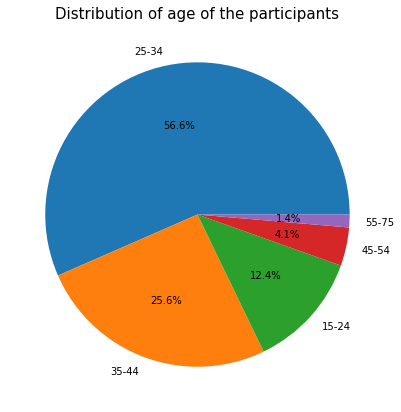

In [23]:
plt.figure(figsize=(7,7))
counts=data_cleaned["Age_range"].value_counts()
plt.pie(counts.values, labels=counts.index, autopct='%1.1f%%')
plt.title("Distribution of age of the participants",fontsize=15)
plt.show()

# encoding the features (transforming them from string to integer numbers):

In [24]:
X=data_cleaned.copy()
my_list=list(data_cleaned.columns)
my_list.remove("Age")
for i in my_list:
    LE=LabelEncoder()
    X[i]=LE.fit_transform(data_cleaned[i])
    
X.head(5)

,Age,Gender,Country,self_employed,family_history,treatment,work_interfere,no_employees,remote_work,tech_company,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,Age_range
0,37,0,44,0,0,1,2,4,0,1,...,2,1,1,1,2,1,0,2,0,2
1,44,1,44,0,0,0,3,5,0,0,...,0,0,1,0,0,1,1,0,0,2
2,32,1,6,0,0,0,3,4,0,1,...,1,1,1,2,2,2,2,1,0,1
3,31,1,43,0,1,1,2,2,0,1,...,1,2,2,1,0,0,0,1,1,1
4,31,1,44,0,0,0,1,1,1,1,...,0,1,1,1,2,2,2,0,0,1


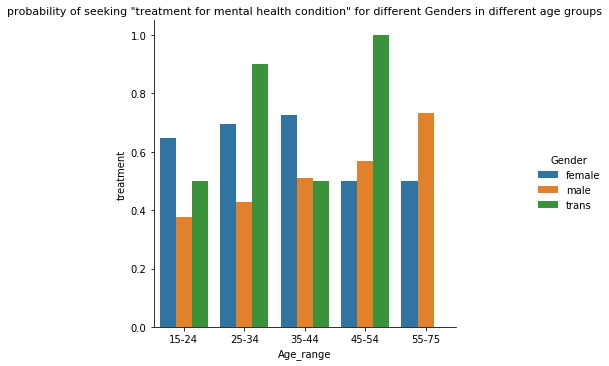

In [25]:
plot=sns.catplot(x="Age_range",y="treatment",hue="Gender",data=X, kind="bar",ci=None,legend=True)
plot.set_xticklabels(data_cleaned["Age_range"].unique().sort_values())
for t, l in zip(plot._legend.texts, data_cleaned["Gender"].unique()): t.set_text(l)
plt.title("probability of seeking \"treatment for mental health condition\" for different Genders in different age groups", fontsize=11)    
plt.show()

**Next, In order to prepare our data for being used by machine learning algorithms, We choose the "treatment" column as labels, and other columns as features:**

**We also split data into training and test sets and sclae it so that all the features are of the same scale. Scaling improves the training process.**

In [26]:
y=X["treatment"]
del X["treatment"]
np.array(y)

array([1, 0, 0, ..., 1, 0, 1])

In [27]:
#splitting data into training and test sets:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
print("X_train's shape: ", X_train.shape)
print("X_test's shape: ", X_test.shape)
print("y_train's shape: ", y_train.shape)
print("y_test's shape: ", y_test.shape)

X_train's shape:  (1000, 24)
X_test's shape:  (250, 24)
y_train's shape:  (1000,)
y_test's shape:  (250,)


In [28]:
#Scaling 
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

# Training different machine learning algorithms to predict probability of a person seeking treatment for his/her mental problem based on the condition he/she is in:

**1) Support vector classifier (SVC):**

In [29]:
svc = SVC(probability=True)
svc.fit(X_train,y_train)
y_pred = svc.predict(X_test)
y_pred_train=svc.predict(X_train)
y_prob=svc.predict_proba(X_test)

print("accuracy of the svc model on test set:","{:0.3f}".format(accuracy_score(y_test,y_pred)))
print("accuracy of the svc model on training set:","{:0.3f}".format(accuracy_score(y_train,y_pred_train)))
print("precision of the svc model:","{:0.3f}".format(precision_score(y_test,y_pred)))
print("recall of the svc model:", "{:0.3f}".format(recall_score(y_test,y_pred)))
print("recall of the svc model:", "{:0.3f}".format(recall_score(y_test,y_pred)))
print("f1-score of the svc model:", "{:0.3f}".format(f1_score(y_test,y_pred)))

accuracy of the svc model on test set: 0.828
accuracy of the svc model on training set: 0.871
precision of the svc model: 0.823
recall of the svc model: 0.866
recall of the svc model: 0.866
f1-score of the svc model: 0.844


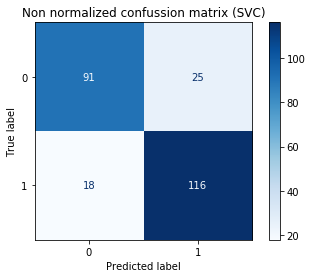

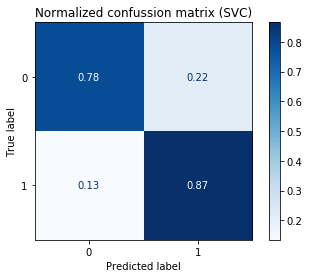

In [30]:
#plotting Confusion matrix
disp= plot_confusion_matrix(svc, X_test, y_test, cmap=plt.cm.Blues, normalize=None,values_format="d")
disp_normal=plot_confusion_matrix(svc, X_test, y_test, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Non normalized confussion matrix (SVC)")
disp_normal.ax_.set_title("Normalized confussion matrix (SVC)")
plt.show()

**Next we plot precision-recall curve:**

**Precision-Recall curves summarize the trade-off between the precision and the recall for a predictive model using different probability thresholds. A high area under the curve shows high precision and high recall which is the ideal case. High precision relates to low false positives and high recall relates to low false negatives.**

**A system with high recall but low precision (low threshold) returns many positive results, but most of its predicted labels are incorrect when compared to the training labels. A system with high precision but low recall (high threshold) is the opposite, returning very few positive results, but most of its predicted labels are correct when compared to the training labels. An ideal system with high precision and high recall will return many results, with all results labeled correctly.**

average_precision:  0.8915193698844555


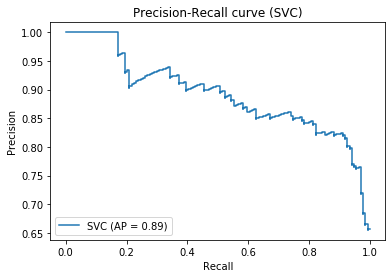

In [31]:
#plotting precision-recal curve
average_precision=average_precision_score(y_test, y_prob[:,1])
print("average_precision: ",average_precision)
disp = plot_precision_recall_curve(svc, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve (SVC)')
plt.show()

**2) K nearest neighbors classifier (KNN):**

In [32]:
knn = KNeighborsClassifier(n_neighbors=35)
knn.fit(X_train, y_train)
y_pred =knn.predict(X_test)
y_pred_train=knn.predict(X_train)
y_prob=knn.predict_proba(X_test)

print("accuracy of the KNN model on test set:","{:0.3f}".format(accuracy_score(y_test,y_pred)))
print("accuracy of the KNN model on training set:","{:0.3f}".format(accuracy_score(y_train,y_pred_train)))
print("precision of the KNN model:","{:0.3f}".format(precision_score(y_test,y_pred)))
print("recall of the KNN model:","{:0.3f}".format(recall_score(y_test,y_pred)))
print("f1-score of the KNN model:", "{:0.3f}".format(f1_score(y_test,y_pred)))

accuracy of the KNN model on test set: 0.772
accuracy of the KNN model on training set: 0.786
precision of the KNN model: 0.808
recall of the KNN model: 0.754
f1-score of the KNN model: 0.780


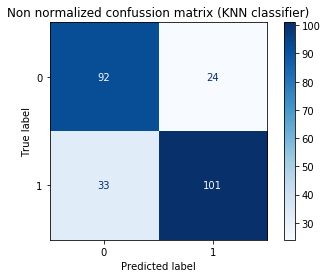

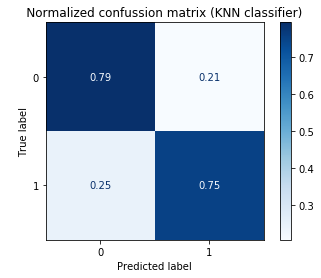

In [33]:
#Plotting confussion matrix:
disp= plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues, normalize=None,values_format="d")
disp_normal=plot_confusion_matrix(knn, X_test, y_test, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Non normalized confussion matrix (KNN classifier)")
disp_normal.ax_.set_title("     Normalized confussion matrix (KNN classifier)")
plt.show()

average_precision:  0.8688262555801526


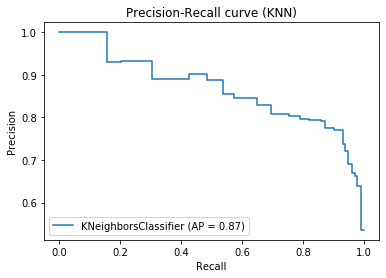

In [34]:
#Plotting precision-recall curve
average_precision=average_precision_score(y_test, y_prob[:,1])
print("average_precision: ",average_precision)
disp = plot_precision_recall_curve(knn, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve (KNN)')
plt.show()

**3) Logistic Regression:**

In [35]:
LR=LogisticRegression()
LR.fit(X_train,y_train)
y_pred =LR.predict(X_test)
y_pred_train=LR.predict(X_train)
y_prob=LR.predict_proba(X_test)

print("accuracy of the Logistic Regression model on test set:","{:0.3f}".format(accuracy_score(y_test,y_pred)))
print("accuracy of the Logistic Regression model on training set:","{:0.3f}".format(accuracy_score(y_train,y_pred_train)))
print("precision of the Logistic Regression model:","{:0.3f}".format(precision_score(y_test,y_pred)))
print("recall of the Logistic Regression model:","{:0.3f}".format(recall_score(y_test,y_pred)))
print("f1-score of the Logistic Regression model:", "{:0.3f}".format(f1_score(y_test,y_pred)))

accuracy of the Logistic Regression model on test set: 0.812
accuracy of the Logistic Regression model on training set: 0.817
precision of the Logistic Regression model: 0.827
recall of the Logistic Regression model: 0.821
f1-score of the Logistic Regression model: 0.824


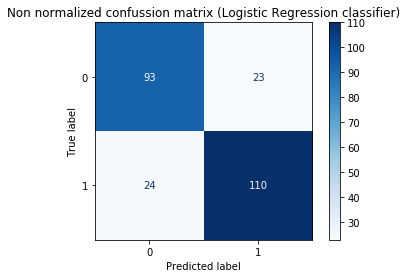

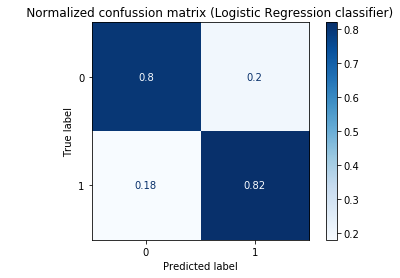

In [36]:
#Plotting confussion matrix:
disp= plot_confusion_matrix(LR, X_test, y_test, cmap=plt.cm.Blues, normalize=None,values_format="d")
disp_normal=plot_confusion_matrix(LR, X_test, y_test, cmap=plt.cm.Blues, normalize="true")
disp.ax_.set_title("Non normalized confussion matrix (Logistic Regression classifier)")
disp_normal.ax_.set_title("     Normalized confussion matrix (Logistic Regression classifier)")
plt.show()

average_precision:  0.8853659623861887


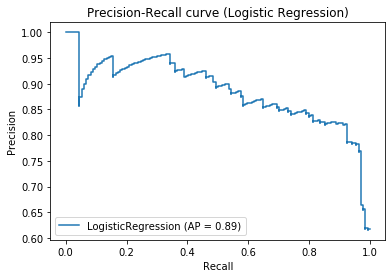

In [37]:
#Plotting precision-recall curve
average_precision=average_precision_score(y_test, y_prob[:,1])
print("average_precision: ",average_precision)
disp = plot_precision_recall_curve(LR, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve (Logistic Regression)')
plt.show()